In [26]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt


INP_SIZE = (200, 200)
MODEL_PATH = './model/061122/'

def check_vial_images(in_img):
    """
    Returns True if obstructed.
    """
    model = keras.models.load_model(MODEL_PATH)
    predictions = model.predict(in_img)
    return np.argmax(predictions, axis=1).astype(bool)

def preprocess_dataset(image):
    image = tf.image.resize(image, (INP_SIZE[0], INP_SIZE[1]))
    return image

In [31]:
# inference on hold out data
class_names = ['clean', 'noisy']

dset = tf.keras.utils.image_dataset_from_directory('./test')
dset = dset.map(lambda x, y: preprocess_dataset(x))
batch = next(iter(dset))

predictions = check_vial_images(batch)

Found 12 files belonging to 2 classes.


In [32]:
predictions

array([ True,  True,  True,  True, False,  True, False,  True,  True,
        True, False,  True])

<ipython-input-33-8e3a35eadb1d>:5: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  plt.title(class_names[predictions[ix]])


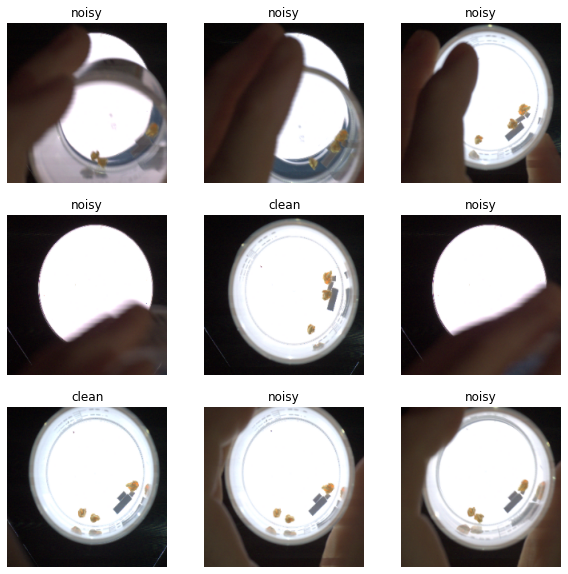

In [33]:
plt.figure(figsize=(10, 10))
for ix in range(9):
    ax = plt.subplot(3, 3, ix + 1)
    plt.imshow(batch[ix].numpy().astype("uint8"))
    plt.title(class_names[predictions[ix]])
    plt.axis("off")